In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
fname = "/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/poster/figures/fid_labounty.root"
f = r.TFile(fname)
f.ls()

TFile**		/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/fid_labounty.root	
 TFile*		/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/fid_labounty.root	


Error in <TFile::TFile>: file /home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/fid_labounty.root does not exist


In [3]:
c1 = f.Get("c1")
print([x for x in c1.GetListOfPrimitives()])

AttributeError: 'TObject' object has no attribute 'GetListOfPrimitives'

In [ ]:
gr = c1.GetPrimitive("Graph").Clone("gr")

In [ ]:
h = c1.GetPrimitive("htemp").Clone("h")
h.SetDirectory(0)

In [ ]:
c = r.TCanvas("c","c",8000,4000)
gr.SetTitle("Example Free Induction Decay; Time [Arb. Units]; Amplitude")
gr.SetLineWidth(5)
gr.Draw()

r.gStyle.SetHistLineWidth(2)

xlow = 738000
xhigh = 738400
yhigh = 15000
ylow = 1000

#gr.GetXaxis().SetRangeUser(738000,738400)
gr.GetYaxis().SetRangeUser(ylow,yhigh)

box1 = r.TBox(xlow, ylow, xhigh, yhigh)
box1.SetFillColorAlpha(45,0.2)
box1.SetLineColor(45)
box1.SetLineWidth(5)
box1.Draw("L")

arrow = r.TArrow(xhigh+10, 12000, xhigh+950, 12000, 0.025, ">")
arrow.SetLineWidth(8)
arrow.Draw()

gr2 = gr.Clone()
gr2.SetTitle(";;")
gr2.GetXaxis().SetRangeUser(xlow, xhigh)
pad2 = r.TPad("pad2","",0.5, 0.55, 0.945, 0.94,0,0,0)
pad2.SetFillStyle(0)
pad2.SetLineWidth(6)
pad2.cd()
gr2.Draw()

c.cd(0)
pad2.Draw()

c.Draw()
#c.Print("/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/fid_labounty.eps")
#c.Print("/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/fid_labounty.png")

---

In [ ]:
fname = "/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/poster/trackRecoPlots_15921_15991.root"
f = r.TFile(fname)
f.ls()

In [ ]:
h = f.Get("Extrapolation/vertices/allStations/h_vertexPosSpread").Clone("h_BeamDist")
h.SetDirectory(0)

In [ ]:
c = r.TCanvas("c","c",1050,1000)
r.gPad.SetRightMargin(0.15)
#r.gPad.SetLeftMargin(0.19)

r.gStyle.SetPalette(112)
r.gStyle.SetNumberContours(80)

h.SetTitle("Reconstructed Beam Distribution from Straw Tracker; Radial Position [mm]; Vertical Position [mm]")
h.GetXaxis().SetRangeUser(-55,55)
h.GetYaxis().SetRangeUser(-55,55)

h.Draw("colz")

palette = h.GetListOfFunctions().FindObject("palette")
#palette.SetX1NDC(0.9);
#palette.SetX2NDC(0.95);
#palette.SetY1NDC(0.2);
#palette.SetY2NDC(0.8);
r.gPad.Modified();
r.gPad.Update();


storageregion = r.TEllipse(1.1,0,45,45)
storageregion.SetFillColorAlpha(2,0)
storageregion.SetLineColor(17)
storageregion.SetLineWidth(2)
storageregion.SetFillStyle(0)
storageregion.Draw("SAME")

#c.SetLogz()
c.Update()
c.Draw()
#c.Print("/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/trackerDistribution.png")
#c.Print("/home/jlab/GoogleDrive/Research/Conferences/oSTEM 2019/figures/trackerDistribution.eps")

---

### lets see if theres a better E vs. t plot we can use

In [4]:
f = r.TFile("./fitting/data/9Day539AClustersCoincidences.root")
h = f.Get("clustersAndCoincidences").Get("clusters").Clone()
h.SetDirectory(0)

h2 = h.Project3D("yx").Clone("h2")
h2.Rebin2D(5,1)

In [22]:
print(h2.GetXaxis().GetNbins(),h2.GetYaxis().GetNbins())

5629 300


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


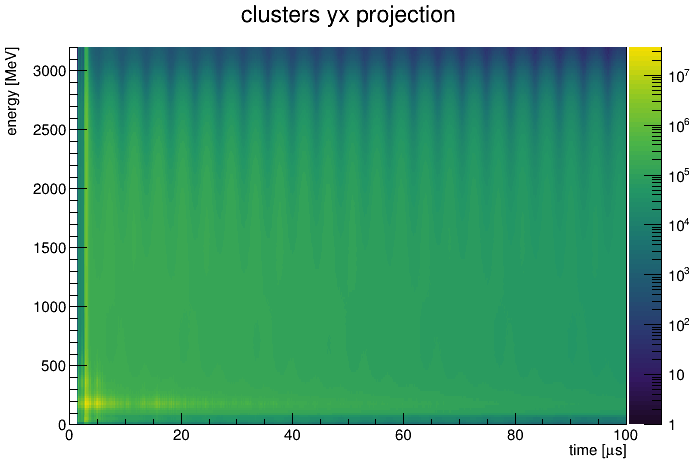

In [23]:
c = r.TCanvas("c","c",)
r.gStyle.SetPalette(112)
r.gStyle.SetNumberContours(80)

h2.GetYaxis().SetRangeUser(0,3200)
h2.GetXaxis().SetRangeUser(0,100)
h2.Draw("colz")

c.SetLogz()
c.Draw()